In [1]:
import pickle
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

from models.victim_params import VictimParams


# One-way with n snoopers

In [ ]:
n = 3
victim_circ_uuid = '3a03572b-c786-449e-b9ed-4fea2fb16b54'

In [ ]:
with open('./pickles/victim_circs/one_way_cnot_{}.p'.format(victim_circ_uuid), 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    victim_params: VictimParams
    random_victim_qcs, victim_params = pickle.load(f)


In [ ]:
attack_qregs = QuantumRegister(n, name='a')
victim_qregs = QuantumRegister(victim_params.no_of_qubits, name='v')
cregs = ClassicalRegister(n, 'c')

In [ ]:
intial_qc = QuantumCircuit(attack_qregs, victim_qregs, cregs)
intial_qc.h(attack_qregs)
intial_qc.barrier()

In [ ]:
full_qcs = []
for qc in random_victim_qcs:
    full_qc = intial_qc.compose(qc, victim_qregs)
    full_qc.barrier()
    full_qc.h(attack_qregs)
    full_qc.measure(attack_qregs, cregs)
    full_qcs.append(full_qc)


In [ ]:
pickle.dump( (full_qcs, victim_params), open( "pickles/full_circs/one_way_cnot_{}_snoopers_{}.p".format(n, str(victim_params.uuid)), "wb" ) )

# Two-way with n snoopers

In [ ]:
n = 3
victim_circ_uuid = 'f6bcf9c3-a057-4f9b-acf7-8d804262a33c'

In [ ]:
with open('./pickles/victim_circs/two_way_cnot_{}.p'.format(victim_circ_uuid), 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    victim_params: VictimParams
    random_victim_qcs, victim_params = pickle.load(f)


In [ ]:
attack_qregs = QuantumRegister(n, name='a')
victim_qregs = QuantumRegister(victim_params.no_of_qubits, name='v')
cregs = ClassicalRegister(n, 'c')

In [ ]:
intial_qc = QuantumCircuit(attack_qregs, victim_qregs, cregs)
intial_qc.h(attack_qregs)
intial_qc.barrier()

In [ ]:
full_qcs = []
for qc in random_victim_qcs:
    full_qc = intial_qc.compose(qc, victim_qregs)
    full_qc.barrier()
    full_qc.h(attack_qregs)
    full_qc.measure(attack_qregs, cregs)
    full_qcs.append(full_qc)


In [ ]:
pickle.dump( (full_qcs, victim_params), open( "pickles/full_circs/two_way_cnot_{}_snoopers_{}.p".format(n, str(victim_params.uuid)), "wb" ) )

# Bigger Victim - 4 qubits chain with depth 1 Guadalupe

In [35]:
victim_qubits = (5, 8, 11, 14)
snooper_qubits_1 = (3, 9, 13)
snooper_qubits_2 = (2, 12)
snooper_qubits_3 = (1, 10, 15)
ancilla_qubits = (0, 4, 6, 7)

In [36]:
with open('./pickles/victim_circs/four_qubit_chain_d1.p', 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    random_victim_qcs = pickle.load(f)

In [37]:
attack_qregs_1 = QuantumRegister(len(snooper_qubits_1), name='a1')
attack_qregs_2 = QuantumRegister(len(snooper_qubits_2), name='a2')
attack_qregs_3 = QuantumRegister(len(snooper_qubits_3), name='a3')
ancilla = QuantumRegister(len(ancilla_qubits), name='ancilla')
victim_qregs = QuantumRegister(4, name='v')
cregs_1 = ClassicalRegister(len(snooper_qubits_1), 'c1')
cregs_2 = ClassicalRegister(len(snooper_qubits_2), 'c2')
cregs_3 = ClassicalRegister(len(snooper_qubits_3), 'c3')

In [38]:
intial_qc = QuantumCircuit(attack_qregs_1, attack_qregs_2, attack_qregs_3, ancilla, victim_qregs, cregs_1, cregs_2, cregs_3)
intial_qc.h(attack_qregs_1)
intial_qc.h(attack_qregs_2)
intial_qc.h(attack_qregs_3)
intial_qc.barrier()

In [39]:
full_qcs = []
for qc in random_victim_qcs:
    full_qc = intial_qc.compose(qc, victim_qregs)
    full_qc.barrier()
    full_qc.h(attack_qregs_1)
    full_qc.h(attack_qregs_2)
    full_qc.h(attack_qregs_3)
    full_qc.measure(attack_qregs_1, cregs_1)
    full_qc.measure(attack_qregs_2, cregs_2)
    full_qc.measure(attack_qregs_3, cregs_3)
    full_qc.name = qc.name
    full_qcs.append(full_qc)


In [41]:
pickle.dump( full_qcs, open( "pickles/full_circs/four_qubit_chain_d1.p", "wb" ) )

# Bigger Victim - 4 qubits chain with 0135 - 16 qubit machine

## Params

In [29]:
no_of_qubits = 16
no_of_victims = 4
no_of_attackers = 12
no_of_ancilla = no_of_qubits - no_of_victims - no_of_attackers

In [30]:
attack_qregs = QuantumRegister(no_of_attackers, name='a')
victim_qregs = QuantumRegister(no_of_victims, name='v')
ancilla_qregs = QuantumRegister(no_of_ancilla, name='ancilla')
cregs = ClassicalRegister(no_of_attackers, 'c')

## Load Pickle

In [31]:
with open('./pickles/victim_circs/four_qubit_chain_0135.p', 'rb') as f:
    qcs_per_reps: list[QuantumCircuit]
    qcs_per_reps = pickle.load(f)

## Full circs

In [32]:
intial_qc = QuantumCircuit(attack_qregs, victim_qregs, ancilla_qregs, cregs)
intial_qc.h(attack_qregs)
intial_qc.barrier()

In [33]:
full_qcs_per_reps = {}
for cnot_reps, qcs in qcs_per_reps.items():
    full_qcs = []
    for qc in qcs:
        full_qc = intial_qc.compose(qc, victim_qregs)
        full_qc.barrier()
        full_qc.h(attack_qregs)
        full_qc.measure(attack_qregs, cregs)
        full_qcs.append(full_qc)
    full_qcs_per_reps[cnot_reps] = full_qcs    


In [38]:
pickle.dump(full_qcs_per_reps, open( "pickles/full_circs/{}_qubit_machine_{}_qubit_chain_{}_snoopers.p".format(no_of_qubits, no_of_victims, no_of_attackers), "wb" ) )

# 4 qubits chain (5, 8, 11, 14) with 0135 fixed time window - 16 qubit machine (Guadalupe)

## Params

In [2]:
no_of_qubits = 16
no_of_victims = 4
no_of_attackers = 12
no_of_ancilla = no_of_qubits - no_of_victims - no_of_attackers
attacker_snooping_window_duration = 2e-06
duration_unit = 's'

In [3]:
attack_qregs = QuantumRegister(no_of_attackers, name='a')
victim_qregs = QuantumRegister(no_of_victims, name='v')
ancilla_qregs = QuantumRegister(no_of_ancilla, name='ancilla')
cregs = ClassicalRegister(no_of_attackers, 'c')

## Load Pickle

In [4]:
with open('./pickles/victim_circs/four_qubit_chain_0135.p', 'rb') as f:
    qcs_per_reps: list[QuantumCircuit]
    qcs_per_reps = pickle.load(f)

## Full circs

In [5]:
intial_qc = QuantumCircuit(attack_qregs, victim_qregs, ancilla_qregs, cregs)
intial_qc.h(attack_qregs)
intial_qc.barrier()

In [7]:
full_qcs_per_reps = {}
for cnot_reps, qcs in qcs_per_reps.items():
    full_qcs = []
    for qc in qcs:
        full_qc = intial_qc.compose(qc, victim_qregs)
        full_qc.delay(duration=attacker_snooping_window_duration, qarg=attack_qregs, unit=duration_unit)
        full_qc.barrier()
        full_qc.h(attack_qregs)
        full_qc.measure(attack_qregs, cregs)
        full_qcs.append(full_qc)
    full_qcs_per_reps[cnot_reps] = full_qcs    


In [10]:
pickle.dump(full_qcs_per_reps, open( "pickles/full_circs/gudalupe_{}_qubit_chain_{}_snoopers_window_{}{}.p".format(no_of_victims, no_of_attackers, attacker_snooping_window_duration, duration_unit), "wb" ) )

# 4 qubits chain (5, 8, 11, 14) with 013 fixed time window - 16 qubit machine (Guadalupe)

## Params

In [11]:
no_of_qubits = 16
no_of_victims = 4
no_of_attackers = 12
no_of_ancilla = no_of_qubits - no_of_victims - no_of_attackers
attacker_snooping_window_duration = 1.152e-06
duration_unit = 's'

In [12]:
attack_qregs = QuantumRegister(no_of_attackers, name='a')
victim_qregs = QuantumRegister(no_of_victims, name='v')
ancilla_qregs = QuantumRegister(no_of_ancilla, name='ancilla')
cregs = ClassicalRegister(no_of_attackers, 'c')

## Load Pickle

In [13]:
with open('./pickles/victim_circs/four_qubit_chain_0135.p', 'rb') as f:
    qcs_per_reps: list[QuantumCircuit]
    qcs_per_reps = pickle.load(f)

del qcs_per_reps[5]

## Full circs

In [14]:
intial_qc = QuantumCircuit(attack_qregs, victim_qregs, ancilla_qregs, cregs)
intial_qc.h(attack_qregs)
intial_qc.barrier()

In [15]:
full_qcs_per_reps = {}
for cnot_reps, qcs in qcs_per_reps.items():
    full_qcs = []
    for qc in qcs:
        full_qc = intial_qc.compose(qc, victim_qregs)
        full_qc.delay(duration=attacker_snooping_window_duration, qarg=attack_qregs, unit=duration_unit)
        full_qc.barrier()
        full_qc.h(attack_qregs)
        full_qc.measure(attack_qregs, cregs)
        full_qcs.append(full_qc)
    full_qcs_per_reps[cnot_reps] = full_qcs    


In [16]:
pickle.dump(full_qcs_per_reps, open( "pickles/full_circs/gudalupe_{}_qubit_chain_{}_snoopers_window_{}{}.p".format(no_of_victims, no_of_attackers, attacker_snooping_window_duration, duration_unit), "wb" ) )

# 4 qubits chain (5, 8, 11, 14) with 0135 fixed time window - 16 qubit machine (Guadalupe) x32

## Params

In [2]:
no_of_qubits = 16
no_of_victims = 4
no_of_attackers = 12
no_of_ancilla = no_of_qubits - no_of_victims - no_of_attackers
attacker_snooping_window_duration = 8641
measurement_reps = 32

In [3]:
attack_qregs = QuantumRegister(no_of_attackers, name='a')
victim_qregs = QuantumRegister(no_of_victims, name='v')
ancilla_qregs = QuantumRegister(no_of_ancilla, name='ancilla')
cregs_list = []
for i in range(measurement_reps):
    cregs = ClassicalRegister(no_of_attackers, 'c_{}'.format(i))
    cregs_list.append(cregs)

In [4]:
with open('./pickles/victim_circs/four_qubit_chain_0135.p', 'rb') as f:
    qcs_per_reps: list[QuantumCircuit]
    qcs_per_reps = pickle.load(f)

## Full circs

In [5]:
empty_qc = QuantumCircuit(attack_qregs, victim_qregs, ancilla_qregs, *cregs_list)

In [6]:
prep_attack_qc = QuantumCircuit(attack_qregs)
prep_attack_qc.h(attack_qregs)

In [7]:
read_attack_qc = QuantumCircuit(attack_qregs, cregs_list[0])
read_attack_qc.h(attack_qregs)
read_attack_qc.measure(attack_qregs, cregs_list[0])

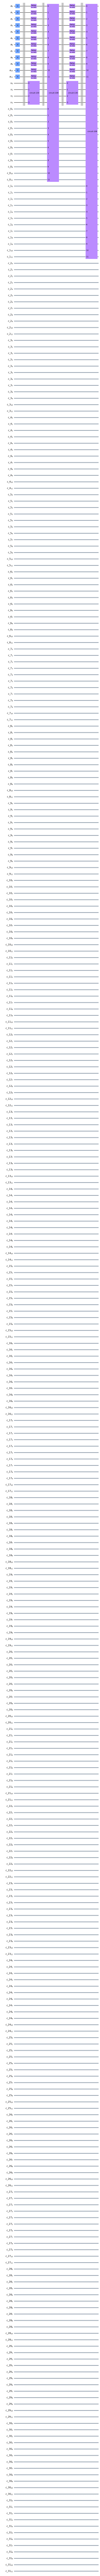

In [87]:
full_qcs_per_reps = {}
for cnot_reps, qcs in [(3, qcs_per_reps[3]), ]:#qcs_per_reps.items():
    full_qcs = []
    for qc in qcs:
        full_qc = empty_qc.compose(prep_attack_qc, attack_qregs)
        for i in range(measurement_reps):
            full_qc.barrier()
            full_qc.append(qc, victim_qregs)
            full_qc.delay(duration=2e-06, qarg=attack_qregs, unit="s")
            full_qc.barrier()
            full_qc.append(read_attack_qc, attack_qregs, cregs_list[i])
            # TODO: reset attacker qubits
        display(full_qc.draw('mpl', scale=0.1))
        break
        # full_qc = empty_qc.compose(qc, victim_qregs)
        # full_qc = intial_qc.compose(qc, victim_qregs)
        # 
        # full_qc.barrier()
        # full_qc.h(attack_qregs)
        # full_qc.measure(attack_qregs, cregs)
        # full_qcs.append(full_qc)
    # full_qcs_per_reps[cnot_reps] = full_qcs    


In [ ]:
# pickle.dump(full_qcs_per_reps, open( "pickles/full_circs/gudalupe_{}_qubit_chain_{}_snoopers_window_{}.p".format(no_of_victims, no_of_attackers, attacker_snooping_window_duration), "wb" ) )